# BIMM 185 Lab Report 2
*Eric Mauritzen*



## Tuesday, April 11
### Exercise 1

We had to iterate over all directories in dirtree and extract the top GSAT Z-score from reach report.tbl file.  We compiled these into an output file with the basedirectory and z-score sorted by z-score first then basedirectory.

![title](Exercise1.png) 

The exercise was a good refresher on shell scripting and I learned to use trhe sort utility to sort multiple columns at a time.

### Exercise 2: E. Coli Genome
Questions:
- What is the name and length of the largest protein?
- What is the name and length of the smallest protein?
- How many proteins in forward strand?
- How many proteins in reverse strand?
- What is the largest protein in forward strand?
- What are the gene names of all ribosomal proteins?

In [1]:
import pandas as pd
df = pd.read_table('ProteinTable.txt')

In [2]:
# What are the longest proteins?
df.sort_values('Length', ascending=False)[['Locus','Length']].iloc[0:2]

,Locus,Length
1872,yeeJ,2358
2387,yfhM,1653


In [3]:
# What are the shortest proteins?
df.sort_values('Length', ascending=True)[['Locus', 'Length']].iloc[0:2]

,Locus,Length
1187,trpL,14
1619,pheM,14


In [4]:
# How many proteins in the forward or reverses strands
# Get a single column and check column counts
s = df.ix[:,4]
s.value_counts()

-    2128
+    2012
Name: Strand, dtype: int64

In [5]:
# Longest proteins in forward strand
df.loc[df['Strand'] == '+'].sort_values('Length', ascending=False)[['Locus', 'Length']].iloc[0:2]

,Locus,Length
1872,yeeJ,2358
1558,lhr,1538


In [6]:
# Get all ribosomal proteins
# Scroll down to see size of table (66)
df.loc[df['Protein name'].str.contains('ribosomal')]

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Locus tag,Protein product,Length,COG(s),Protein name
21,chr,NC_000913.3,20815,21078,-,944759,rpsT,b0023,NP_414564.1,87,-,30S ribosomal subunit protein S20
162,chr,NC_000913.3,189874,190599,+,947874,rpsB,b0169,NP_414711.1,241,-,30S ribosomal subunit protein S2
272,chr,NC_000913.3,312514,312777,-,944960,ykgM,b0296,NP_414830.1,87,-,50S ribosomal protein L31 type B; alternative ...
591,chr,NC_000913.3,668719,669036,-,945237,rsfS,b0637,NP_415170.4,105,-,ribosomal silencing factor
769,chr,NC_000913.3,876710,878035,-,945465,rimO,b0835,NP_415356.1,441,-,ribosomal protein S12 methylthiotransferase
786,chr,NC_000913.3,891967,892869,+,945484,rimK,b0852,NP_415373.1,300,-,ribosomal protein S6 modification protein
838,chr,NC_000913.3,954872,956632,-,945509,ycaO,b0905,NP_415425.4,586,-,ribosomal protein S12 methylthiotransferase ac...
844,chr,NC_000913.3,961995,963668,+,945536,rpsA,b0911,NP_415431.1,557,-,30S ribosomal subunit protein S1
994,chr,NC_000913.3,1125562,1126146,+,946910,rimJ,b1066,NP_415584.1,194,-,ribosomal-protein-S5-alanine N-acetyltransferase
1017,chr,NC_000913.3,1147367,1147540,+,945657,rpmF,b1089,NP_415607.1,57,-,50S ribosomal subunit protein L32


### Tabular Annotations (Exercise 3)

Generate a fasta file from the E. Colo genome and the annotations table.

There should be an entry in the fasta file for every row in the table.


In [7]:
# Read in the E. Coli genome
import textwrap
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna

with open('EColi.fna') as f:
    # Open the genome
    ecoli = f.read()

In [8]:
# Make it one string
ecoli_genome = ''.join(ecoli.splitlines()[1:])

In [9]:
# Loop over every row of the table

out_str = ''
for ind, entry in df.iterrows():
    s = entry['Start']
    e = entry['Stop']
    strand = Seq(ecoli_genome[s-1:e], generic_dna)
    out_str += '>'
    out_str += entry['Replicon Accession']
    out_str += '|'
    out_str += entry['Locus']
    out_str += '|'
    out_str += entry['Locus tag']
    out_str += '\n'
    if entry['Strand'] == ('+'):
        out_str += textwrap.fill(str(strand), 70)
    else:
        out_str += textwrap.fill(str(strand.reverse_complement()), 70)
            
    out_str += '\n'
    
print(out_str[0:1000])
print('...')
with open('OutFile.faa', 'w') as f:
    f.write(out_str)

>NC_000913.3|thrL|b0001
ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA
>NC_000913.3|thrA|b0002
ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTC
TGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCT
GGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATT
TTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCG
TCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAG
CATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCG
CGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTA
CCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGAT
GGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCT
GCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTCTATA
CCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAGTCGATGTCCTACCAGGAAGCGATGGAGCT
TTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGC
CTGATTAAAAATACCGGAAATCCTCAAGCACCA

## Thursday, April 13

Implement the Codon-Usage-Index thingy

### Part 1: Modify the old FASTA file to make the sequence one line per gene

In [10]:
# Read in the E. Coli genome
import textwrap
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna

with open('EColi.fna') as f:
    # Open the genome
    ecoli = f.read()
    
# Make it one string
ecoli_genome = ''.join(ecoli.splitlines()[1:])

# Loop over every row of the table
out_str = ''
for ind, entry in df.iterrows():
    s = entry['Start']
    e = entry['Stop']
    strand = Seq(ecoli_genome[s-1:e], generic_dna)
    out_str += entry['Locus tag']
    out_str += '\t'
    if entry['Strand'] == ('+'):
        out_str += str(strand)
    else:
        out_str += str(strand.reverse_complement())
            
    out_str += '\n'
    
# Print just the beginning
print(out_str[0:1000])

# Write to file
with open('OutFile_SingleLine.faa', 'w') as f:
    f.write(out_str)

b0001	ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA
b0002	ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTCTATACCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAGTCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGCCTGATTAAAAATACCGGAAATCCTCAAGCACCAGGTACGCTCATTGGTGCCAGCCGTGATGAAGACGAATTACCGGTCAAG

### Part 2: Create a function to calculate normalized codon frequencies

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
gene_table = pd.read_table('OutFile_SingleLine.faa', names=['gene', 'seq'])

In [12]:
from collections import Counter

codons = textwrap.fill(ecoli_genome.strip()[:10000], 3).splitlines()
codons = set([codon for codon in codons if len(codon) == 3])
base_dict = {codon :0 for codon in codons}
for codon in codons:
    gene_table[codon] = 0

for ind, entry in gene_table.iterrows():
    codons_here = textwrap.fill(entry['seq'],3).splitlines()
    for codon, codon_count in zip(Counter(codons_here).keys(), Counter(codons_here).values()):
        if codon in gene_table.columns:
            gene_table.set_value(ind, codon, codon_count)
        else:
            print('Warning')
            print('Gene: ' + entry['gene'])
                


Warning
Gene: b2891


In [13]:
Counts_DF = gene_table.copy()
del Counts_DF['seq']
Counts_DF = Counts_DF.set_index('gene')


In [14]:
totals = Counts_DF.sum()
normalized_totals = totals / sum(totals)

In [15]:
Norm_Counts = Counts_DF.div(Counts_DF.sum(axis=1), axis=0)

In [16]:
Norm_Counts['CUI'] = 0.0

for ind, entry in Norm_Counts.iterrows():
    val = (Norm_Counts.ix[ind] * normalized_totals).sum()
    Norm_Counts.set_value(ind, 'CUI', val)


In [17]:
Norm_Counts[['CUI']]

,CUI
gene,
b0001,0.023829
b0002,0.022979
b0003,0.022289
b0004,0.024131
b0005,0.019436
b0006,0.023161
b0007,0.021895
b0008,0.025571
b0009,0.022658


(array([    3.,     9.,    46.,   193.,   480.,  1072.,  1463.,   773.,
           97.,     4.]),
 array([ 0.01357541,  0.01503641,  0.01649741,  0.01795842,  0.01941942,
         0.02088042,  0.02234142,  0.02380242,  0.02526342,  0.02672443,
         0.02818543]),
 <a list of 10 Patch objects>)

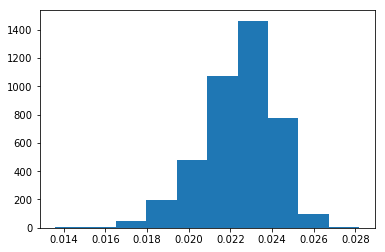

In [18]:
plt.hist(list(Norm_Counts['CUI']))